In [3]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
x1d = linspace(-5,5,1001)
y1d = linspace(-5,5,1001)

x, y = meshgrid(x1d, y1d)

$$ max(f(x,y)) $$
$$ \mathrm{for} \ \  g(x,y) = c $$

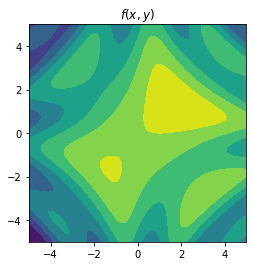

In [71]:
f = -(x-1)**2 + 10*sin(x*y/2) - y**2

plt.contourf(x,y,f)
plt.axis("square")
plt.title(r"$f(x,y)$");

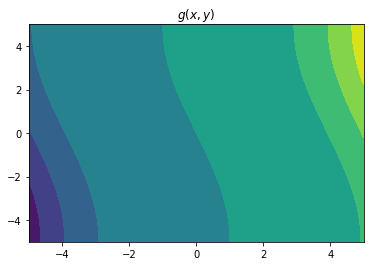

In [46]:
g = (x+sin(y/pi))**3

plt.contourf(x,y,g)
plt.axis("square")
plt.title(r"$g(x,y)$");

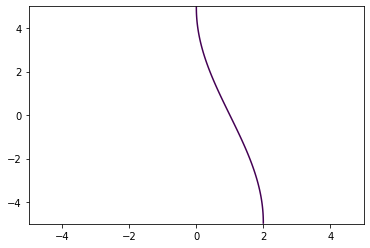

In [47]:
c = 1 # Say g must equal 1
plt.contour(x,y,g,[c]);
plt.axis("square");
# This line is where that is true.

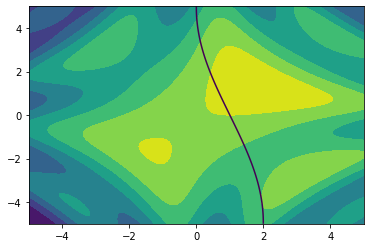

In [48]:
plt.contourf(x,y,f)
plt.axis("square")
plt.contour(x,y,g,[c]);
# We must find maximum f value on this line, where g = 1

Consider g(1,0) = 1

It is not the maximum, but we are gonna look at g's gradient at this point, which in simple terms, is an arrow that tells us which direction is "uphill", and compare it to f's gradient.

In [218]:
g[500,600]

1.0

In [91]:
fdy, fdx = gradient(f)
gdy, gdx = gradient(g)

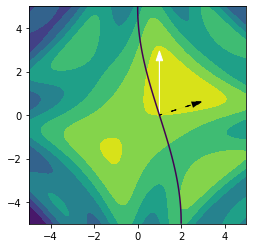

In [120]:
plt.contourf(x,y,f)
plt.contour(x,y,g,[c])
plt.axis("square")
plt.arrow(1, 0, 50*fdx[500,600], 50*fdy[500,600], color="white", head_width=.3)
plt.arrow(1, 0, 50*gdx[500,600], 50*gdy[500,600], color="black", zorder=10, head_width=.3, ls=(0,(5,10)));

See that they are not aligned. Well, it turns out, at points where they are aligned, we have an extrema if we were to only consider values along the g(x,y) = 1 line. Also note, that the graduent will always by perpendicular to this line, as there is no change in "elevation" that occurs as one travels the line.

This part will be hard for most to follow, I am solving for lambda seperately in x and y partials. If there is a extrema, these will both be the same at a coordinate. So, I will consider their difference, to isolate good "points", which are where the lines defined by having equal lambda and the constraint line intersect.. Then, one can check these points. Not easy!

(-5.0, 5.0, -5.0, 5.0)

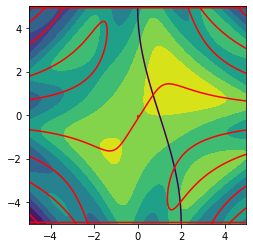

In [131]:
lx = fdx/gdx
ly = fdy/gdy
plt.contourf(x,y,f)
gcon = plt.contour(x,y,g,[c])
lcon = plt.contour(x,y,lx-ly,[0],colors="red")
plt.axis("square")

In [209]:
for gcoords_list in gcon.allsegs[0][:]:
    for gcoords in gcoords_list:
    for lcoords_list in lcon.allsegs[0][:]:
        for lcoords in lcoords_list:
#         print(abs(gcoords[0] - lcoords[0]))
            if abs(gcoords[0] - lcoords[0]) < .0035:
#             print(gcoords)
                if abs(gcoords[1] - lcoords[1]) < .0035: 
                    print(gcoords, lcoords)

[0.71       0.92433458] [0.71       0.92505376]
[ 1.69404558 -2.41      ] [ 1.69741736 -2.41      ]
[ 1.95696293 -4.01      ] [ 1.96       -4.01164631]


These 3 points are the intersections, or very close to them.

2.277746176571765


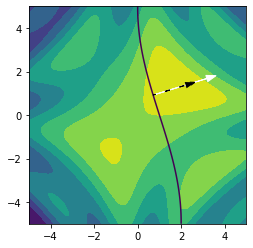

In [220]:
plt.contourf(x,y,f)
plt.contour(x,y,g,[c])
plt.axis("square")
plt.arrow(.71, .92, 50*fdx[592,571], 50*fdy[592,571], color="white", head_width=.3)
plt.arrow(.71, .92, 50*gdx[592,571], 50*gdy[592,571], color="black", zorder=10, head_width=.3, ls=(0,(5,10)));
print(f[592,571])

-15.178629791286095


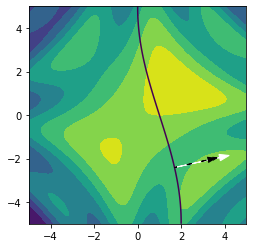

In [223]:
plt.contourf(x,y,f)
plt.contour(x,y,g,[c])
plt.axis("square")
plt.arrow(1.7, -2.41, 50*fdx[259,670], 50*fdy[259,670], color="white", head_width=.3)
plt.arrow(1.7, -2.41, 50*gdx[259,670], 50*gdy[259,670], color="black", zorder=10, head_width=.3, ls=(0,(5,10)));
print(f[259,670])

-9.91079619136141


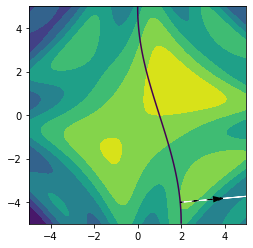

In [225]:
plt.contourf(x,y,f)
plt.contour(x,y,g,[c])
plt.axis("square")
plt.arrow(1.96, -4.01, 50*fdx[99,696], 50*fdy[99,696], color="white", head_width=.3)
plt.arrow(1.96, -4.01, 50*gdx[99,696], 50*gdy[99,696], color="black", zorder=10, head_width=.3, ls=(0,(5,10)));
print(f[99,696])